<a href="https://colab.research.google.com/github/Et7f3/NumericalAnalysis2020/blob/master/Lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab7

## Ex 1

Lagrange :

p(x) = ((x - 6) * (x - 5) * (x - 1)) / ((4 - 6) * (4 - 5) * (4 - 1)) * 2 + ((x - 4) * (x - 5) * (x - 1)) / ((6 - 4) * (6 - 5) * (6 - 1)) * 8 + ((x - 6) * (x - 4) * (x - 1)) / ((5 - 6) * (5 - 4) * (5 - 1)) * 4 + ((x - 6) * (x - 5) * (x - 4)) / ((1 - 6) * (1 - 5) * (1 - 4)) * 10)

see below in code it is correct.

Newton :

a_0 = 2

p_0(x) = a_0

a_1 = (8 - a_0) / (6 - 4)

p_1(x) = a_0 + a_1 * (x - 4)

a_2 = (4 - p_1(5)) / ((5 - 4) * (5 - 6))

p_2(x) = a_0 + a_1 * (x - 4) + a_2 * (x - 4) * (x - 6)

a_3 = (10 - p_2(1)) / ((1 - 4) * (1 - 6) * (1 - 5))

p_3(x) = a_0 + a_1 * (x - 4) + a_2 * (x - 4) * (x - 6) + a_3 * (x - 4) * (x - 6) * (x - 5)

I didn't expand it for visibility and its work. See below also :)

In [35]:
from numpy.polynomial import Polynomial as P

def l(xs, xk):
  up = P(1)
  for e in xs:
    if e != xk: # This also ignore double nodes but that shouldn't happend.
      up *= P([-e, 1])
  down = 1
  for e in xs:
    if e != xk:
      down *= xk - e
  return up, down

def lagrange(points):
  ret = []
  xs = [e for (e, _) in points]

  for (x, f) in points:
    ret.append((l(xs, x), f))

  def p(x):
    v = 0
    for ((up, down), f) in ret:
      v += up(x) / down * f
    return v

  return p

points = [(4, 2), (6, 8), (5, 4), (1, 10)]
response = lagrange(points)

# Lagrange
def p(x):
  return ((x - 6) * (x - 5) * (x - 1)) / ((4 - 6) * (4 - 5) * (4 - 1)) * 2 + ((x - 4) * (x - 5) * (x - 1)) / ((6 - 4) * (6 - 5) * (6 - 1)) * 8 + ((x - 6) * (x - 4) * (x - 1)) / ((5 - 6) * (5 - 4) * (5 - 1)) * 4 + ((x - 6) * (x - 5) * (x - 4)) / ((1 - 6) * (1 - 5) * (1 - 4)) * 10

# Newton
a_0 = 2
def p_0(x):
  return a_0
a_1 = (8 - a_0) / (6 - 4)
def p_1(x):
  return a_0 + a_1 * (x - 4)
a_2 = (4 - p_1(5)) / ((5 - 4) * (5 - 6))
def p_2(x):
  return a_0 + a_1 * (x - 4) + a_2 * (x - 4) * (x - 6)
a_3 = (10 - p_2(1)) / ((1 - 4) * (1 - 6) * (1 - 5))
def p_3(x):
  return a_0 + a_1 * (x - 4) + a_2 * (x - 4) * (x - 6) + a_3 * (x - 4) * (x - 6) * (x - 5)

for x, f in points:
  assert p(x) == f
  assert p_3(x) == f
  assert response(x) == f

print("Assert succeded ☺")

Assert succeded ☺


## Ex 2

In [51]:
def polyplot(xm, ym, xplot, yplot):
  # Import pyplot as plt
  import matplotlib.pyplot as plt

  #plot the function

  plt.plot(xplot, yplot, lw=2, label='interpolation')

  plt.plot(xm, ym, 'o', label='points')

  plt.legend()
  plt.show()

def poly_newton_coefficient(x, y):
    """
    x: list or np array contanining x data points
    y: list or np array contanining y data points
    """

    m = len(x)

    x = np.copy(x)
    a = np.copy(y).astype(float)

    for k in range(1, m):
        for i in range(m-1, k-1, -1):
            a[i] = float(a[i]-a[i-1])/float(x[i]-x[i-k])
            
    return a

def newton_interpolation(x, x_data, y_data):
    """
    x: evaluation point(s)
    x_data: data points at x
    y_data: data points at y
     """
    a = poly_newton_coefficient(x_data, y_data)
    n = len(x_data) - 1  # Degree of polynomial
    p = a[n]
    print("array a = ",a)

    for k in range(1, n + 1):
        p = a[n - k] + (x - x_data[n - k])*p

    return p



# Lagrange Polynomials in Python
import numpy as np

def  lagrange(x,i,xm):
  """
  Evaluates  the i-th  Lagrange  polynomial  at point x 
  based on grid  data xm
  """
  n=len(xm)-1
  y=1.
  for j in  range(n+1):
    if i!=j:
      y*=(x-xm[j])/(xm[i]-xm[j])
  return y


def  interpolation(x,xm ,ym):
  n=len(xm)-1
  lagrpoly=np.array([lagrange(x,i,xm) for i in range(n+1)])
  y = np.dot(ym ,lagrpoly)
  return y

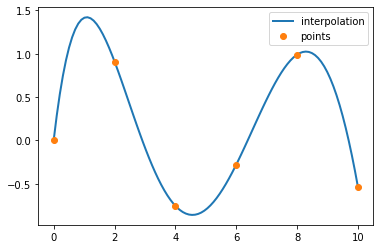

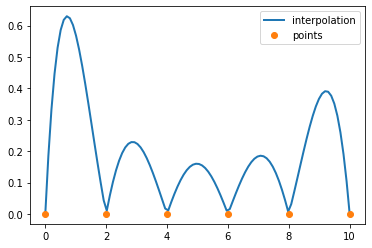

In [61]:
import numpy as np
import math
import matplotlib.pyplot as plt

x = [x for x in range(0, 11, 2)]
xm = np.array(x)
ym = np.array([math.sin(x) for x in x])
xplot = np.linspace(0,10,100)
yplot = interpolation(xplot, xm, ym)
polyplot(xm, ym, xplot, yplot)
polyplot(xm, [0 for _ in ym], xplot, [abs(yplot[i] - math.sin(xplot[i])) for i in range(len(yplot))])

The error is bigger near the first/last nodes and lower nead the middle nodes